In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import scipy.stats as stats

In [13]:
# load data
df_dataset = pd.read_excel("Dataset.xlsx")
df_key = pd.read_excel("Key.xlsx")

In [14]:
# preprocessing
df_dataset.drop('ID',axis=1,inplace=True)
df_dataset.dropna(inplace=True)

# Hypothesis - 3

- Healthcare workers or people who have family members working in healthcare services exhibit significant difference in levels of COVID-19 anxiety compared to the general population.

In [13]:
health_workers = df_dataset[df_dataset['Health_Worker_Self'] == 1]['Covid_Anxiety']
others = df_dataset[df_dataset['Health_Worker_Self'] == 2]['Covid_Anxiety']
print(type(health_workers))

<class 'pandas.core.series.Series'>


In [14]:
print("Number of Health Workers: ", health_workers.count())
print("Others: ", others.count())

Number of Health Workers:  528
Others:  9098


In [15]:
# Calculate the median COVID-19 anxiety score for different groups
median_covid19_anxiety_score = health_workers.median()
print(f"Median COVID-19 anxiety score for healthcare population: {median_covid19_anxiety_score}")

median_covid19_anxiety_score = others.median()
print(f"Median COVID-19 anxiety score for non-healthcare population: {median_covid19_anxiety_score}")


Median COVID-19 anxiety score for healthcare population: 4.0
Median COVID-19 anxiety score for non-healthcare population: 4.0


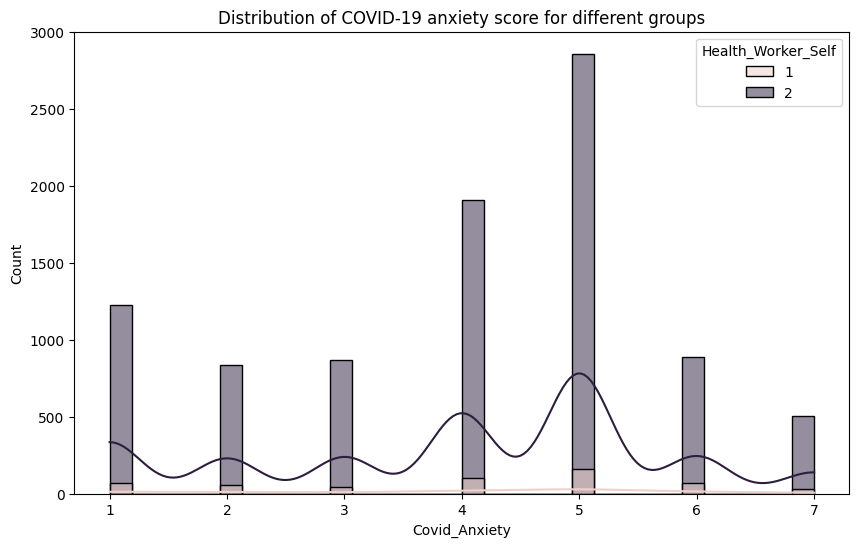

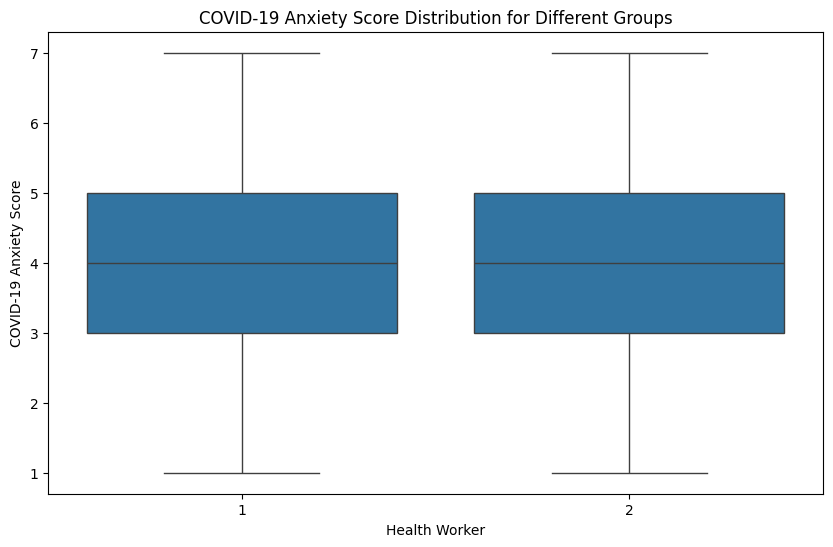

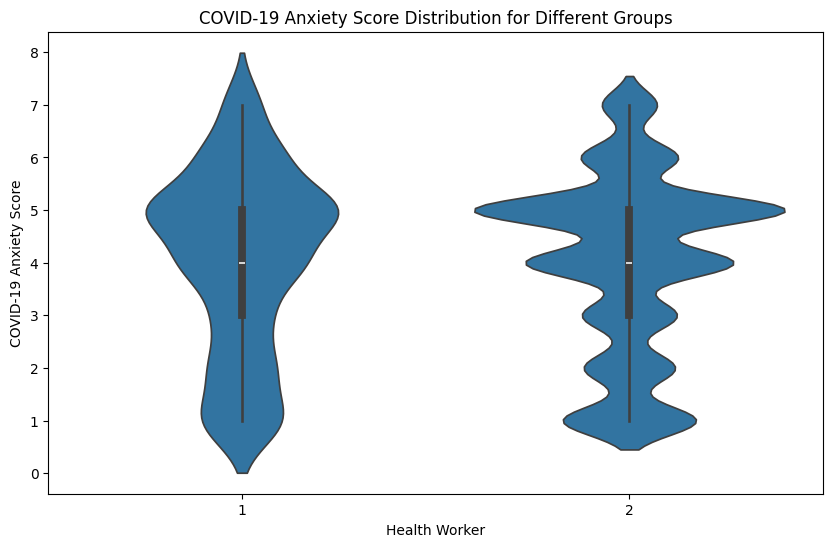

In [16]:
# plot the distribution of COVID-19 anxiety score for different groups
plt.figure(figsize=(10, 6))
sb.histplot(data=df_dataset, x='Covid_Anxiety', hue='Health_Worker_Self', kde=True)
plt.title("Distribution of COVID-19 anxiety score for different groups")
plt.show()

# plot boxplot
plt.figure(figsize=(10, 6))
sb.boxplot(x='Health_Worker_Self', y='Covid_Anxiety', data=df_dataset)
plt.title('COVID-19 Anxiety Score Distribution for Different Groups')
plt.xlabel('Health Worker')
plt.ylabel('COVID-19 Anxiety Score')
plt.show()

# plot violin plot 
plt.figure(figsize=(10, 6))
sb.violinplot(x='Health_Worker_Self', y='Covid_Anxiety', data=df_dataset)
plt.title('COVID-19 Anxiety Score Distribution for Different Groups')
plt.xlabel('Health Worker')
plt.ylabel('COVID-19 Anxiety Score')
plt.show()

- we choose Mann-Whitney U test to test the hypothesis as the data is ordinal and non-parametric.

### Mann-Whitney U Test

In [17]:
result_mwu = stats.mannwhitneyu(health_workers,
                           others)

print("Mann-Whitney U test statistic:", result_mwu.statistic)
print("p-value:", result_mwu.pvalue)

#  Interpret the results
if result_mwu.pvalue < 0.05:
    print("There are statistically significant differences in COVID-19 anxiety levels between healthcare workers or individuals with family members in healthcare services and the general population.")
else:
    print("There are no statistically significant differences in COVID-19 anxiety levels between the two groups.")

Mann-Whitney U test statistic: 2470097.5
p-value: 0.26067813288972397
There are no statistically significant differences in COVID-19 anxiety levels between the two groups.


#### To do
- size difference between the two groups is large, how to handle?
- explain the violin plot
- explain why we are using Mann-Whitney U Test
- write the explanation for the results and the conclusion

#### Bootstrap Sampling

In [18]:
# health_workers = np.array(health_workers)
# others = np.array(others)

# n1 = len(health_workers)
# n2 = len(others)

# all_data = np.concatenate([health_workers, others])

# u_statistics = []

# for _ in range(1000):
#     # Resample with replacement
#     resampled_data = np.random.choice(all_data, size=(n1 + n2), replace=True)
    
#     # Calculate U statistic for the resampled data
#     resampled_group1 = resampled_data[:n1]
#     resampled_group2 = resampled_data[n1:]

#     u_statistic = stats.mannwhitneyu(health_workers, others).pvalue
#     # u_statistic = calculate_u_statistic(resampled_group1, resampled_group2)
    
#     u_statistics.append(u_statistic)    

# p_value = np.mean(u_statistics)
# print("Bootstrap sampled mean of p value: ", p_value)

Bootstrap sampled mean of p value:  0.260678132889724


# Hypothesis 1

### People of different age gropus categories experienced different psychological impacts due to the mild lockdown of COVID-19.

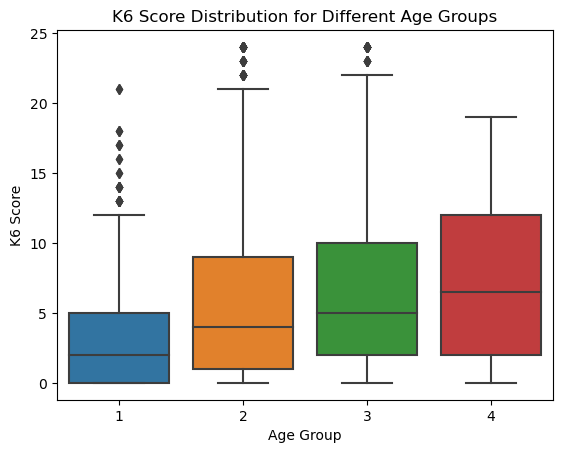

In [5]:
# categorical predictors - Sex, Married, Job_Group, Residence, Income, Age_Group
# K6, PHQ9, UCLA_LS3, LSNS6  - all ordinal variables (outcomes)

# first we test for age vs K6, we have four age groups 1, 2, 3, 4. 1 for >=65, 2 for 40-64, 3 for 20-39, 4 for 18-19
# K6 is the outcome variable
# H0: There is no difference in K6 score across different age groups
# H1: There is a difference in K6 score across different age groups

# K6 vs Age_Group
sb.boxplot(x='Age_Group', y='K6', data=df_dataset)
plt.title('K6 Score Distribution for Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('K6 Score')
plt.show()



In [45]:
K6_age_group_1 = df_dataset[df_dataset['Age_Group'] == 1]['K6']
K6_age_group_2 = df_dataset[df_dataset['Age_Group'] == 2]['K6']
K6_age_group_3 = df_dataset[df_dataset['Age_Group'] == 3]['K6']
K6_age_group_4 = df_dataset[df_dataset['Age_Group'] == 4]['K6']

# mean K6 score for different age groups
print(f"Mean K6 score for age group 1: {K6_age_group_1.mean()}")
print(f"Mean K6 score for age group 2: {K6_age_group_2.mean()}")
print(f"Mean K6 score for age group 3: {K6_age_group_3.mean()}")
print(f"Mean K6 score for age group 4: {K6_age_group_4.mean()}")

# size
print(f"Size of age group 1: {K6_age_group_1.count()}") 
print(f"Size of age group 2: {K6_age_group_2.count()}")
print(f"Size of age group 3: {K6_age_group_3.count()}")
print(f"Size of age group 4: {K6_age_group_4.count()}")

# as the group 4 has very less data, we can combine group 3 and 4
K6_age_group_3_4 = df_dataset[df_dataset['Age_Group'].isin([3, 4])]['K6']

Mean K6 score for age group 1: 6.692125984251969
Mean K6 score for age group 2: 5.913705583756345
Mean K6 score for age group 3: 5.479713603818616
Mean K6 score for age group 4: 3.553894927536232
Size of age group 1: 2540
Size of age group 2: 2364
Size of age group 3: 2514
Size of age group 4: 2208


In [46]:
# as there are 4 groups and ordinal outcome variable, we can use Kruskal-Wallis test
result_kw = stats.kruskal(K6_age_group_1, K6_age_group_2, K6_age_group_3_4)

print("Kruskal-Wallis test statistic:", result_kw.statistic)
print("p-value:", result_kw.pvalue)

#  Interpret the results
if result_kw.pvalue < 0.05:
    print("There are statistically significant differences in K6 scores across different age groups.")
else:
    print("There are no statistically significant differences in K6 scores across different age groups.")


Kruskal-Wallis test statistic: 272.609610426584
p-value: 6.361730085303199e-60
There are statistically significant differences in K6 scores across different age groups.


- The Games-Howell test was conducted as a post hoc analysis, following a significant Kruskal-Wallis test, indicating that there is a statistically significant difference in K6 scores among at least two of the age groups. This test is particularly suitable because it accounts for unequal sample sizes among the groups.


In [47]:
# we do post-hoc analysis if the Kruskal-Wallis test is significant to determine which groups are different we do games-howell test as sample sizes are different
if result_kw.pvalue < 0.05:
    from pingouin import pairwise_gameshowell

    # replace age group 4 with 3
    df_dataset['Age_Group'] = df_dataset['Age_Group'].replace(4, 3)
    posthoc_games_howell = pairwise_gameshowell(data=df_dataset, dv='K6', between='Age_Group')
    print(posthoc_games_howell)

    

   A  B   mean(A)   mean(B)      diff        se          T           df  \
0  1  2  6.692126  5.913706  0.778420  0.161139   4.830745  4901.146661   
1  1  3  6.692126  4.579204  2.112922  0.136007  15.535411  4549.628307   
2  2  3  5.913706  4.579204  1.334502  0.133821   9.972308  4339.682034   

           pval    hedges  
0  4.188248e-06  0.137743  
1  9.214851e-14  0.400528  
2  0.000000e+00  0.259542  


1. Pairwise Comparisons:
- Group 1 (>=65) vs. Group 2 (40-64):
The p-value is extremely small (4.188248e-06), indicating a statistically significant difference in K6 scores between these two groups.
The Hedges' g effect size is 0.137743, suggesting a small effect size. This means the difference in K6 scores, while statistically significant, is not very large in practical terms.
- Group 1 (>=65) vs. Group 3 (18-39):
The p-value is essentially 0 (9.214851e-14), indicating a highly significant difference in K6 scores between these groups.
The Hedges' g effect size is 0.400528, suggesting a medium to large effect size. This means the difference in K6 scores is substantial and practically meaningful.
- Group 2 (40-64) vs. Group 3 (18-39):
The p-value is 0 (0.000000e+00), indicating a highly significant difference in K6 scores.
The Hedges' g effect size is 0.259542, suggesting a small to medium effect size. The difference in K6 scores is statistically significant and practically relevant.
2. Conclusion:
- We reject the null hypothesis of no difference in K6 scores across the three age groups.
- All pairwise comparisons are statistically significant, indicating that each age group has significantly different K6 scores compared to the other two groups.
- The effect sizes suggest that the differences between Group 1 (>=65) and Group 3 (18-39) are the most substantial, followed by the differences between Group 2 (40-64) and Group 3 (18-39).

In [3]:
# Optimism
# Deterioration_Economy
# Deterioration_Interact
# Frustration
# Covid_Anxiety
# Covid_Sleepless
# Difficulty_Living
# Difficulty_Work

# 4th hypothesis ke liye

### People of different Residence categories experienced different psychological impacts due to the mild lockdown of COVID-19.

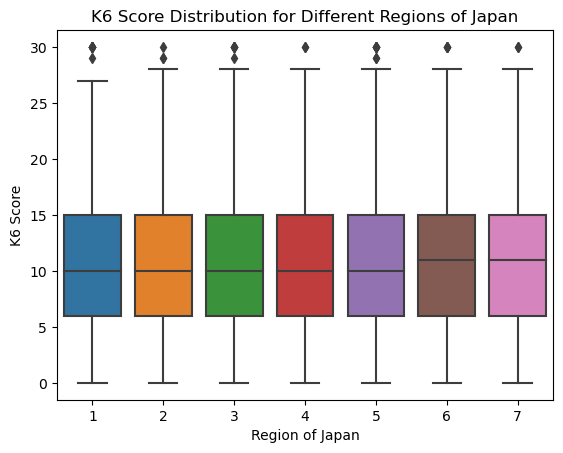

In [62]:
# H0: There is no difference in K6 score across different regions of japan
# H1: There is a difference in K6 score across different regions of japan
# 1 = Tokyo, 2 = Kanagawa, 3 = Saitama, 4 = Chiba, 5 = Osaka, 6 = Hyogo, 7 = Fukuoka
var = "LSNS6"
# K6 vs Residence
sb.boxplot(x='Residence', y=var, data=df_dataset)
plt.title('K6 Score Distribution for Different Regions of Japan')
plt.xlabel('Region of Japan')
plt.ylabel('K6 Score')
plt.show()

In [61]:
k6_region_1 = df_dataset[df_dataset['Residence'] == 1][var] # Tokyo
k6_region_2 = df_dataset[df_dataset['Residence'] == 2][var] # Kanagawa
k6_region_3 = df_dataset[df_dataset['Residence'] == 3][var] # Saitama
k6_region_4 = df_dataset[df_dataset['Residence'] == 4][var] # Chiba
k6_region_5 = df_dataset[df_dataset['Residence'] == 5][var] # Osaka
k6_region_6 = df_dataset[df_dataset['Residence'] == 6][var] # Hyogo
k6_region_7 = df_dataset[df_dataset['Residence'] == 7][var] # Fukuoka

# print mean K6 score for different regions
print(f"Mean K6 score for Tokyo: {k6_region_1.mean()}")
print(f"Mean K6 score for Kanagawa: {k6_region_2.mean()}")
print(f"Mean K6 score for Saitama: {k6_region_3.mean()}")
print(f"Mean K6 score for Chiba: {k6_region_4.mean()}")
print(f"Mean K6 score for Osaka: {k6_region_5.mean()}")
print(f"Mean K6 score for Hyogo: {k6_region_6.mean()}")
print(f"Mean K6 score for Fukuoka: {k6_region_7.mean()}")
# size
print(f"Size of Tokyo: {k6_region_1.count()}")
print(f"Size of Kanagawa: {k6_region_2.count()}")
print(f"Size of Saitama: {k6_region_3.count()}")
print(f"Size of Chiba: {k6_region_4.count()}")
print(f"Size of Osaka: {k6_region_5.count()}")
print(f"Size of Hyogo: {k6_region_6.count()}")
print(f"Size of Fukuoka: {k6_region_7.count()}")


Mean K6 score for Tokyo: 3.986180904522613
Mean K6 score for Kanagawa: 4.027599486521181
Mean K6 score for Saitama: 4.046474358974359
Mean K6 score for Chiba: 4.011009174311926
Mean K6 score for Osaka: 3.9889466840052017
Mean K6 score for Hyogo: 3.9539614561027836
Mean K6 score for Fukuoka: 3.942528735632184
Size of Tokyo: 2388
Size of Kanagawa: 1558
Size of Saitama: 1248
Size of Chiba: 1090
Size of Osaka: 1538
Size of Hyogo: 934
Size of Fukuoka: 870


In [51]:
# as there are 7 groups and ordinal outcome variable, we can use Kruskal-Wallis test
result_kw = stats.kruskal(k6_region_1, k6_region_6, k6_region_7)

print("Kruskal-Wallis test statistic:", result_kw.statistic)
print("p-value:", result_kw.pvalue)

#  Interpret the results
if result_kw.pvalue < 0.05:
    print("There are statistically significant differences in K6 scores across different regions of Japan.")
else:
    print("There are no statistically significant differences in K6 scores across different regions of Japan.")

Kruskal-Wallis test statistic: 0.6168672160243154
p-value: 0.7345967219168233
There are no statistically significant differences in K6 scores across different regions of Japan.
